In [1]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [19]:
plot_style='o-'

In [2]:
stats_file_name_0 = 'stats.dat'
stats_file_name_1 = 'stats_4.dat'
stats_file_name_2 = 'stats_10_2.dat'
stats_file_name_3 = 'stats_16.dat'
stats_file_name_4 = 'stats_100.dat'
stats_file_name_5 = 'stats_200.dat'
stats_file_name_6 = 'stats_300.dat'
stats_file_name_7 = 'stats_350.dat'
stats_file_name_8 = 'stats_20.dat'

In [3]:
stats_0 = pd.read_csv(stats_file_name_0)
stats_1 = pd.read_csv(stats_file_name_1)
stats_2 = pd.read_csv(stats_file_name_2)
stats_3 = pd.read_csv(stats_file_name_3)
stats_4 = pd.read_csv(stats_file_name_4)
stats_5 = pd.read_csv(stats_file_name_5)
stats_6 = pd.read_csv(stats_file_name_6)
stats_7 = pd.read_csv(stats_file_name_7)
stats_8 = pd.read_csv(stats_file_name_8)

In [4]:
stats_0['sample'] = range(stats_0['count'].size)
stats_1['sample'] = range(stats_1['count'].size)
stats_2['sample'] = range(stats_2['count'].size)
stats_3['sample'] = range(stats_3['count'].size)
stats_4['sample'] = range(stats_4['count'].size)
stats_5['sample'] = range(stats_5['count'].size)
stats_6['sample'] = range(stats_6['count'].size)
stats_7['sample'] = range(stats_7['count'].size)
stats_8['sample'] = range(stats_8['count'].size)

In [5]:
labels = ['2 threads',
          '4 threads', 
          '10 threads', 
          '16 threads', 
          '100 threads', 
          '200 threads', 
          '300 threads', 
          '350 threads',
         '20 threads']
data_index = ['threads_2', 
              'threads_4', 
              'threads_10', 
              'threads_16', 
              'threads_100', 
              'threads_200', 
              'threads_300', 
              'threads_350',
             'threads_20']

In [6]:
df_tpm = pd.DataFrame({'threads_2':stats_0['tpm'], 
                       'threads_4': stats_1['tpm'], 
                       'threads_10': stats_2['tpm'], 
                       'threads_16': stats_3['tpm'], 
                       'threads_100': stats_4['tpm'],
                       'threads_200': stats_5['tpm'],
                      'threads_300': stats_6['tpm'],
                      'threads_350': stats_7['tpm'],
                      'threads_20': stats_8['tpm']})

Text(0.5, 0, 'samplig period')

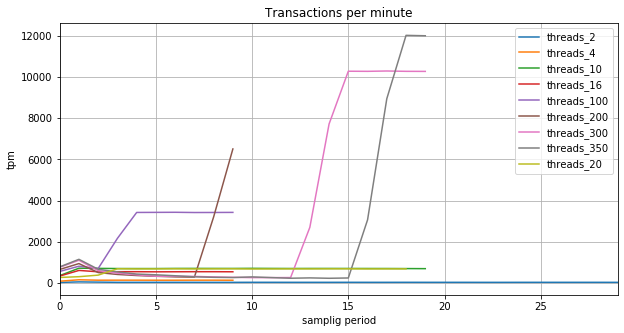

In [31]:
#pp.figure(figsize=(20, 5))
myplot = df_tpm.plot(figsize=(10, 5), grid=True, legend=True)
pp.title('Transactions per minute')
pp.ylabel('tpm')
pp.xlabel('samplig period')

[Text(0, 0, '2 threads'),
 Text(0, 0, '4 threads'),
 Text(0, 0, '10 threads'),
 Text(0, 0, '16 threads'),
 Text(0, 0, '100 threads'),
 Text(0, 0, '200 threads'),
 Text(0, 0, '300 threads'),
 Text(0, 0, '350 threads'),
 Text(0, 0, '20 threads')]

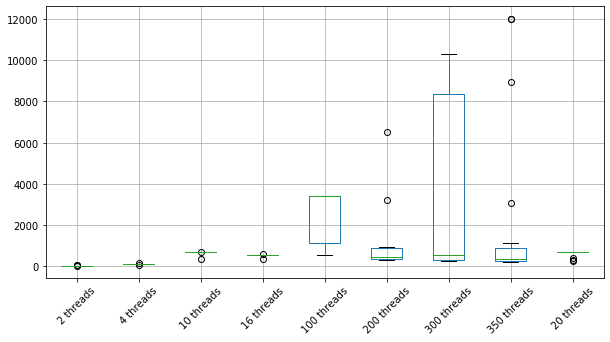

In [28]:
ax = df_tpm.plot(kind='box', rot=45,figsize=(10, 5), grid=True, legend=False)
ax.set_xticklabels(labels)

Text(0.5, 0, 'Number of Threads')

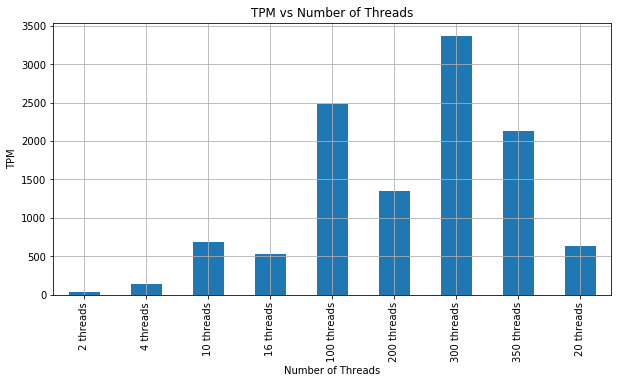

In [27]:
ax = df_tpm.mean().plot(kind='bar',figsize=(10, 5), grid=True, legend=False)
ax.set_xticklabels(labels)
pp.title('TPM vs Number of Threads')
pp.ylabel('TPM')
pp.xlabel('Number of Threads')

In [10]:
df_ttpm = pd.DataFrame({'threads_2':stats_0['ttpm'], 
                        'threads_4': stats_1['ttpm'], 
                        'threads_10': stats_2['ttpm'], 
                        'threads_16': stats_3['ttpm'], 
                        'threads_100': stats_4['ttpm'], 
                        'threads_200': stats_5['ttpm'],
                      'threads_300': stats_6['ttpm'],
                      'threads_350': stats_7['ttpm'],
                      'threads_20': stats_8['ttpm']})

<Figure size 720x360 with 0 Axes>

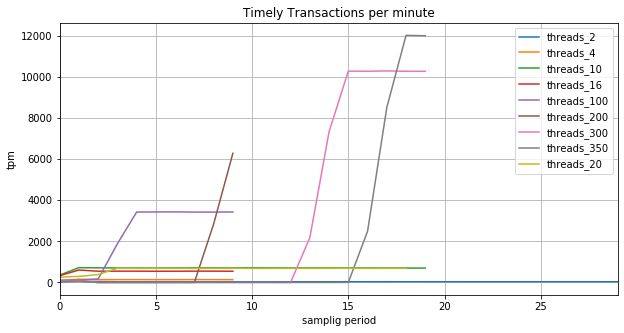

In [26]:
pp.figure(figsize=(10, 5))
df_ttpm.plot(figsize=(10, 5), grid=True)
pp.title('Timely Transactions per minute')
pp.ylabel('tpm')
pp.xlabel('samplig period')

[Text(0, 0, '2 threads'),
 Text(0, 0, '4 threads'),
 Text(0, 0, '10 threads'),
 Text(0, 0, '16 threads'),
 Text(0, 0, '100 threads'),
 Text(0, 0, '200 threads'),
 Text(0, 0, '300 threads'),
 Text(0, 0, '350 threads'),
 Text(0, 0, '20 threads')]

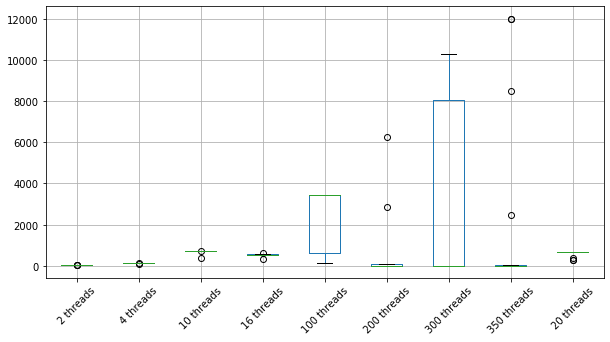

In [24]:
ax = df_ttpm.plot(kind='box', rot=45, figsize=(10, 5), grid=True, legend=False)
ax.set_xticklabels(labels)

Text(0.5, 0, 'Number of Threads')

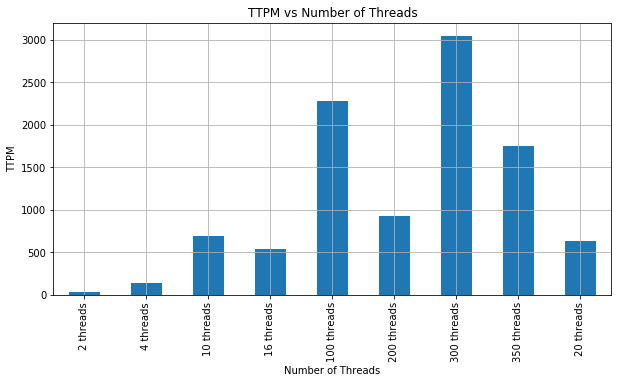

In [23]:
ax = df_ttpm.mean().plot(kind='bar',figsize=(10, 5), grid=True, legend=False)
ax.set_xticklabels(labels)
pp.title('TTPM vs Number of Threads')
pp.ylabel('TTPM')
pp.xlabel('Number of Threads')

In [14]:
df_txn = pd.DataFrame()
df_txn['tpm'] = df_tpm.mean()
df_txn['ttpm'] = df_ttpm.mean()
df_txn['rate'] = df_ttpm.mean()/df_tpm.mean()
df_txn['experiment'] = pd.Series(data=labels,index=data_index)

Text(0.5, 0, 'Number of Threads')

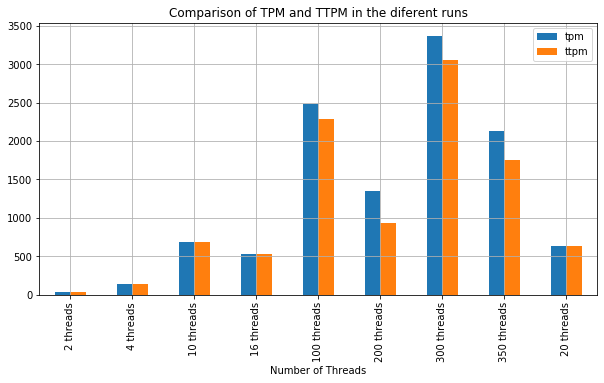

In [22]:
df_txn.plot('experiment', ['tpm', 'ttpm'],kind = 'bar', figsize=(10, 5), grid=True)
pp.title('Comparison of TPM and TTPM in the diferent runs')
pp.xlabel('Number of Threads')

Text(0.5, 0, 'Number of Threads')

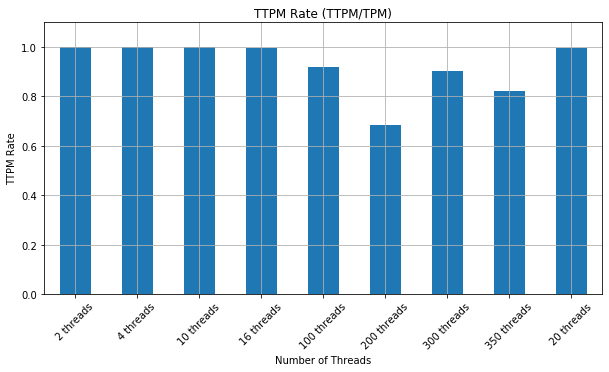

In [33]:
df_txn.plot('experiment',['rate'], ylim=(0,1.1), kind='bar', rot=45, style=plot_style,figsize=(10, 5), grid=True, legend=False)
pp.title('TTPM Rate (TTPM/TPM)')
pp.ylabel('TTPM Rate')
pp.xlabel('Number of Threads')